# Medium - codeexpertslearning.com.br

https://blog.codeexpertslearning.com.br/lendo-imagens-uma-abordagem-%C3%A0-ocr-com-google-tesseract-e-python-ee8e8009f2ab

In [8]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pathlib
import warnings
warnings.filterwarnings('ignore')

## Tentand com a primeira image

In [2]:
import pytesseract as ocr

from PIL import Image

phrase = ocr.image_to_string(Image.open('os-pensamentos.jpeg'), lang='por')
print(phrase)

Os pensamentos mais
simples já foram ideias
complexas para o mundo



## Tentando com a 2 que fica bugada

In [3]:
img_2 = 'bem-vindo-a-sao-luis.jpeg'

In [4]:
phrase = ocr.image_to_string(Image.open(img_2), lang='por')
print(phrase)

BEM VINDO

   



## Como resolver

Problemas

Como listado nesta [wiki](https://github.com/tesseract-ocr/tesseract/wiki/ImproveQuality). Várias etapas podem ser feitas para melhorar a fidelidade da Engine, tais como: Redimensionamento, binarização, redução de ruídos, rotação/alinhamento das linhas e remoção das bordas.

Uma fidelidade absurda, com variações facilmente corrigíveis de caixa alta posteriormente.

Parafraseando a wiki, uma imagem elegível para uma extração mais fiel pelo tesseract OCR deve possuir as seguintes recomendações:

+ Dois canais de cores somente (preto e branco). Seja ela em escala de cinza (0≤ Vi≤ 255) ou então a imagem binarizada (Vi== 0 || Vi== 255). Vi=Valor de intensidade.
+ Texto alinhado/padronizado e sem ruídos (gerados geralmente durante a etapa de binarização).
+ Altura do box (espaço ocupado pelos caracteres) superior ao mínimo de 10px.
+ Densidade ideal de 300dpi, ou proporcionais para o pressuposto acima.
+ Possuir o texto extraível em um único padrão de alfabeto (ou idioma).
+ Sem espaço inútil, considerado como bordas para o texto.

O Tesseract faz a maioria destes processos internamente, mas há casos (como o acima) em que não é o suficiente. Para estes é necessária a subotimização da imagem a ser enviada por parâmetro, afinal a Engine ainda não é um tradutor interplanetário como o C-3PO.

Uma reprodução para exemplificar a etapa de binarização que ele faz seguindo o tópico improve quality da documentação mas utilizando o OpenCV é mais ou menos a seguinte:



In [19]:
import pytesseract as ocr
import numpy as np
import cv2

from PIL import Image

# tipando a leitura para os canais de ordem RGB
imagem = Image.open(img_2).convert('RGB')

# convertendo em um array editável de numpy[x, y, CANALS]
npimagem = np.asarray(imagem).astype(np.uint8)  

# diminuição dos ruidos antes da binarização
npimagem[:, :, 0] = 0 # zerando o canal R (RED)
npimagem[:, :, 2] = 0 # zerando o canal B (BLUE)

# atribuição em escala de cinza
im = cv2.cvtColor(npimagem, cv2.COLOR_RGB2GRAY) 

# aplicação da truncagem binária para a intensidade
# pixels de intensidade de cor abaixo de 127 serão convertidos para 0 (PRETO)
# pixels de intensidade de cor acima de 127 serão convertidos para 255 (BRANCO)
# A atrubição do THRESH_OTSU incrementa uma análise inteligente dos nivels de truncagem
ret, thresh = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) 

# reconvertendo o retorno do threshold em um objeto do tipo PIL.Image
binimagem = Image.fromarray(thresh) 

# chamada ao tesseract OCR por meio de seu wrapper
phrase = ocr.image_to_string(binimagem, lang='por')

# impressão do resultado
print(phrase) 

In [20]:
phrase

' \n\x0c'

In [17]:
thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [21]:
binimagem.show()

AttributeError: shape

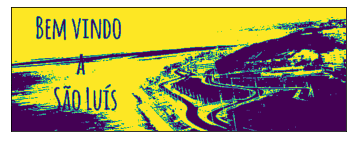

In [13]:
# Mostra uma imagem
def cv_show_image(file_path, scale=cv2.COLOR_BGR2RGB):
    cv_image = cv2.imread(file_path)
    cv_image = cv2.cvtColor(cv_image, scale) # BGR -> RGB
    plt.imshow(cv_image)
    plt.xticks([])
    plt.yticks([])
    print('Original Image Shape', cv_image.shape)

In [14]:
def cv_show_array_image(image_darray):
    plt.imshow(image_darray)
    plt.xticks([])
    plt.yticks([])
    print('Image Shape', image_darray.shape)

AttributeError: shape

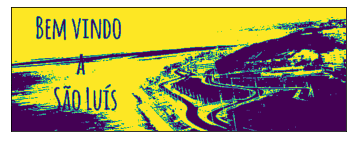

In [22]:
cv_show_array_image(binimagem)

# Lendo Stories

In [23]:
phrase = ocr.image_to_string(Image.open('example-storie.png'), lang='por')
print(phrase)

O vascaíno, sabendo que o seu time do
coração não é capaz de grandes conquistas,
coloca todas as suas esperanças na derrota do
seu rival. A maior ambição do vascaíno, é ver
o Flamengo ser humilhado!

Os fracassados, são contra a afirmação do
forte. Eles não vencem, e não querem que os
outros vençam. São ressentidos, em sua alma
habita o mais impotente ódio contra os
vencedores. Já que eles próprios não são
capazes da conquista, eles vivem para tentar
impedir que o forte se afirme.

 

